In [ ]:
import pandas as pd
import numpy as np
credit=pd.read_csv('/content/German Credit Data.csv')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [ ]:
x_features=list(credit.columns)
x_features.remove('status')
x_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [ ]:
encoded_credit=pd.get_dummies(credit[x_features],drop_first=True)
list(encoded_credit.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [ ]:
y=credit.status 
x=encoded_credit
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
cf_tree=DecisionTreeClassifier(criterion='gini',max_depth=3)
cf_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
tree_predict=cf_tree.predict(x_test)
tree_predict
from sklearn import metrics
metrics.roc_auc_score(y_test,tree_predict)

0.582028241335045

[Text(0.5, 0.875, 'X[8] <= 0.5\ngini = 0.414\nsamples = 700\nvalue = [495, 205]'),
 Text(0.25, 0.625, 'X[0] <= 31.5\ngini = 0.484\nsamples = 430\nvalue = [254, 176]'),
 Text(0.125, 0.375, 'X[9] <= 0.5\ngini = 0.459\nsamples = 350\nvalue = [225, 125]'),
 Text(0.0625, 0.125, 'gini = 0.441\nsamples = 326\nvalue = [219, 107]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 24\nvalue = [6, 18]'),
 Text(0.375, 0.375, 'X[16] <= 0.5\ngini = 0.462\nsamples = 80\nvalue = [29, 51]'),
 Text(0.3125, 0.125, 'gini = 0.423\nsamples = 69\nvalue = [21, 48]'),
 Text(0.4375, 0.125, 'gini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.75, 0.625, 'X[25] <= 0.5\ngini = 0.192\nsamples = 270\nvalue = [241, 29]'),
 Text(0.625, 0.375, 'X[1] <= 2257.5\ngini = 0.408\nsamples = 42\nvalue = [30, 12]'),
 Text(0.5625, 0.125, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.6875, 0.125, 'gini = 0.488\nsamples = 26\nvalue = [15, 11]'),
 Text(0.875, 0.375, 'X[4] <= 19.5\ngini = 0.138\nsamples = 228\nvalue = [211

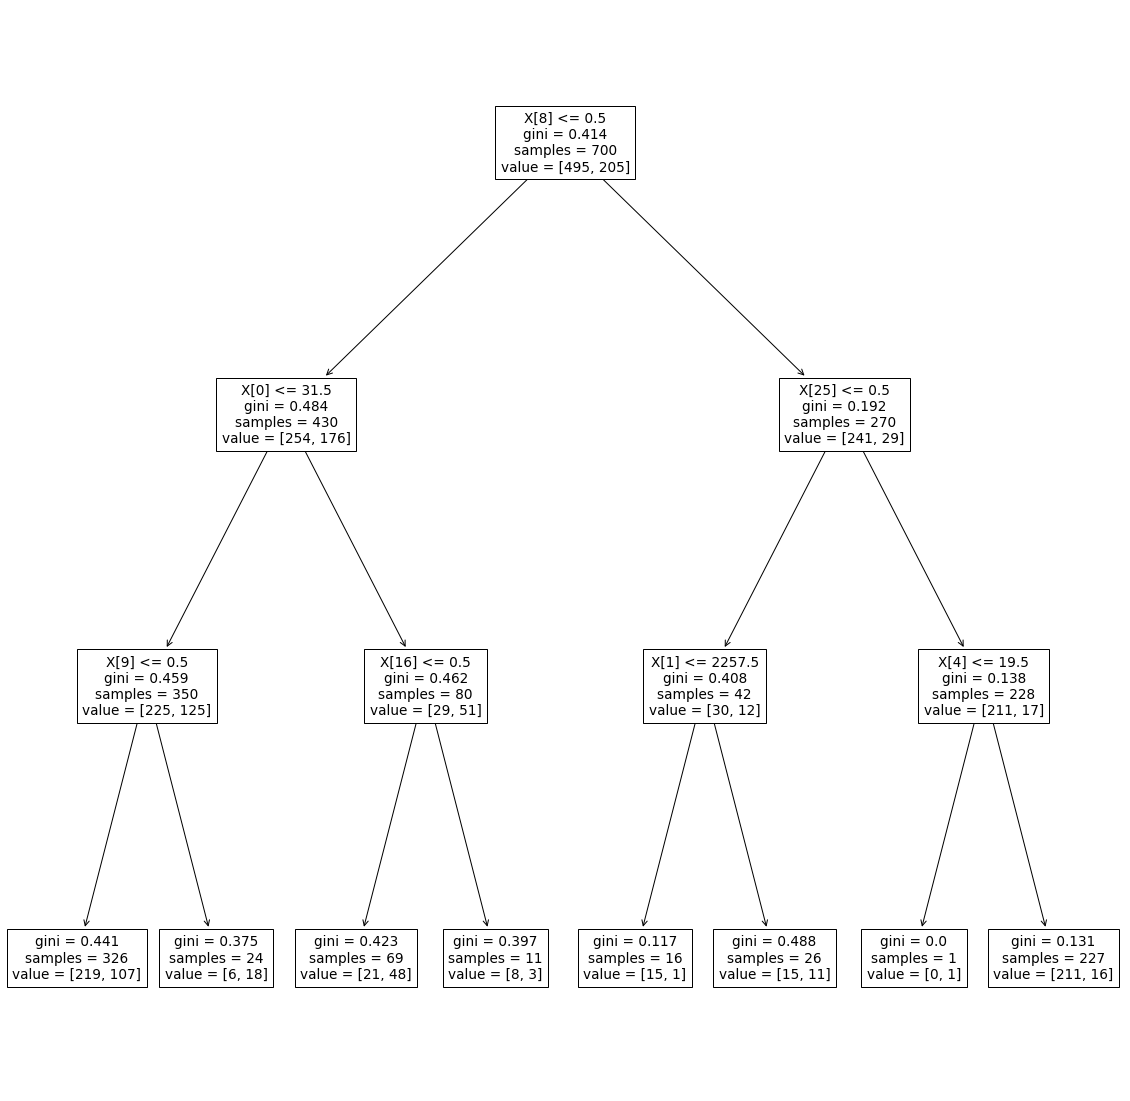

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(cf_tree)